In [542]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [543]:
df= pd.read_csv("/content/covid19.csv",error_bad_lines=False)
df.head(5)

,Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,1,30/01/20,Kerala,1,0,0,0
1,2,31/01/20,Kerala,1,0,0,0
2,3,01/02/20,Kerala,2,0,0,0
3,4,02/02/20,Kerala,3,0,0,0
4,5,03/02/20,Kerala,3,0,0,0


In [544]:
df.shape

(270, 7)

In [545]:
df.columns

Index(['Sno', 'Date', 'State/UnionTerritory', 'ConfirmedIndianNational',
       'ConfirmedForeignNational', 'Cured', 'Deaths'],
      dtype='object')

In [546]:
df.describe

<bound method NDFrame.describe of      Sno      Date  ... Cured  Deaths
0      1  30/01/20  ...     0       0
1      2  31/01/20  ...     0       0
2      3  01/02/20  ...     0       0
3      4  02/02/20  ...     0       0
4      5  03/02/20  ...     0       0
..   ...       ...  ...   ...     ...
265  266  21/03/20  ...     0       0
266  267  21/03/20  ...     0       0
267  268  21/03/20  ...     9       0
268  269  21/03/20  ...     0       0
269  270  21/03/20  ...     0       0

[270 rows x 7 columns]>

In [547]:
df.dtypes

Sno                          int64
Date                        object
State/UnionTerritory        object
ConfirmedIndianNational      int64
ConfirmedForeignNational     int64
Cured                        int64
Deaths                       int64
dtype: object

STATE WISE GROUP BY

In [548]:
df2=df.groupby('State/UnionTerritory', as_index=False,sort='True').sum()
df2 = df.drop(columns = ['Sno','Date'])
df2.head(10)

,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,Kerala,1,0,0,0
1,Kerala,1,0,0,0
2,Kerala,2,0,0,0
3,Kerala,3,0,0,0
4,Kerala,3,0,0,0
5,Kerala,3,0,0,0
6,Kerala,3,0,0,0
7,Kerala,3,0,0,0
8,Kerala,3,0,0,0
9,Kerala,3,0,0,0


In [549]:
e = {'State/UnionTerritory': df2['State/UnionTerritory'], 'Total': np.sum(df2.iloc[:,1:],axis=1)}
d11= pd.DataFrame(data=e)
d11

,State/UnionTerritory,Total
0,Kerala,1
1,Kerala,1
2,Kerala,2
3,Kerala,3
4,Kerala,3
...,...,...
265,Jammu and Kashmir,4
266,Ladakh,13
267,Uttar Pradesh,33
268,Uttarakhand,3


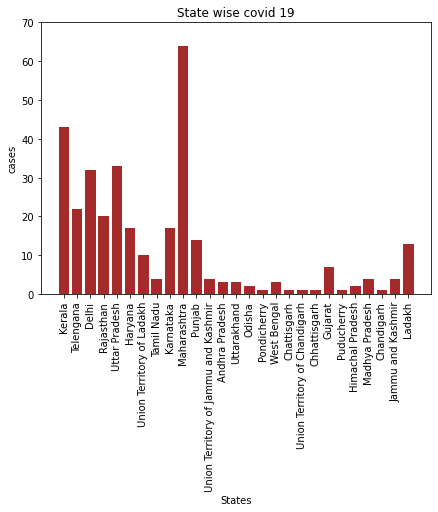

In [550]:
fig1 =plt.figure(figsize = (7,5))
plt.bar(d11['State/UnionTerritory'],d11['Total'],color='brown')
plt.yticks(np.arange(0, 80, 10))
plt.xticks(rotation=90)
plt.title("State wise covid 19")
plt.xlabel("States")
plt.ylabel("cases")
plt.show()

DATE WISE GROUP BY

In [551]:
df = df.drop(columns = ['Sno','State/UnionTerritory'])
df["Date"] = pd.to_datetime(df["Date"]).dt.strftime('%d-%m-%y')
df["Date"] = pd.to_datetime(df["Date"])
df=df.groupby('Date', as_index=False,sort='True').sum()
df.head(10)

,Date,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,2020-01-30,1,0,0,0
1,2020-01-31,1,0,0,0
2,2020-02-01,2,0,0,0
3,2020-02-02,3,0,0,0
4,2020-02-03,3,0,0,0
5,2020-02-04,3,0,0,0
6,2020-02-05,3,0,0,0
7,2020-02-06,3,0,0,0
8,2020-02-07,3,0,0,0
9,2020-02-08,3,0,0,0


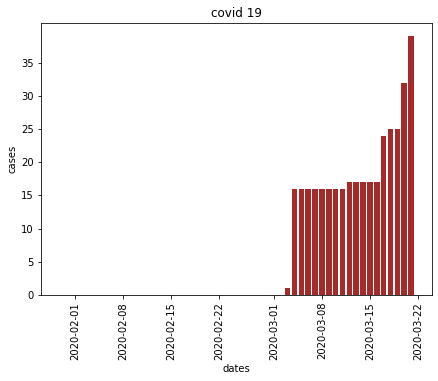

In [552]:
fig1 =plt.figure(figsize = (7,5))
plt.bar(df['Date'],df['ConfirmedForeignNational'],color='brown')
plt.yticks(np.arange(0, 40, 5))
plt.xticks(rotation=90)
plt.title("covid 19")
plt.xlabel("dates")
plt.ylabel("cases")
plt.show()

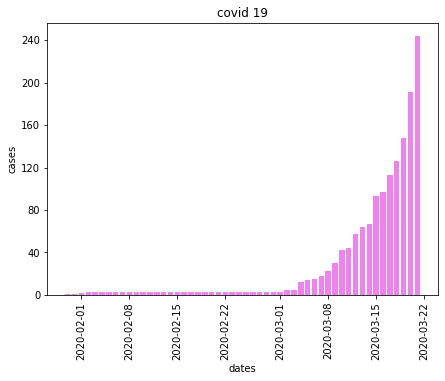

In [553]:
fig1 =plt.figure(figsize = (7,5))
plt.bar(df['Date'],df['ConfirmedIndianNational'],color='violet')
plt.yticks(np.arange(0, 270, 40))
plt.xticks(rotation=90)
plt.title("covid 19")
plt.xlabel("dates")
plt.ylabel("cases")
plt.show()

In [554]:
d = {'Date': df['Date'], 'Total': np.sum(df.iloc[:,1:],axis=1)}
d1= pd.DataFrame(data=d)
d1.head(5)

,Date,Total
0,2020-01-30,1
1,2020-01-31,1
2,2020-02-01,2
3,2020-02-02,3
4,2020-02-03,3


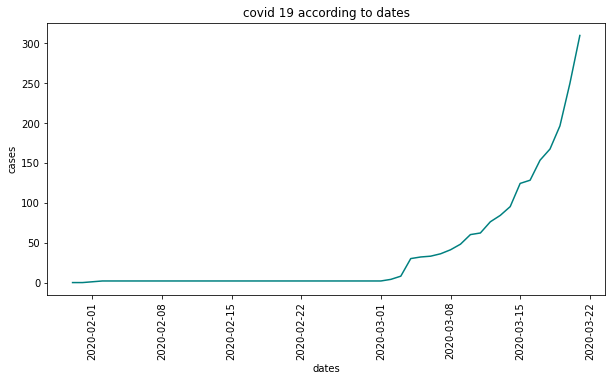

In [555]:
fig1 =plt.figure(figsize = (10,5))
plt.plot(d1['Date'],d1['Total'],color='teal')
plt.yticks(np.arange(0, 350, 50))
plt.xticks(rotation=90)
plt.title("covid 19 according to dates")
plt.xlabel("dates")
plt.ylabel("cases")
plt.show()

In [556]:
d1['Change']=pd.Series(d1['Total'].pct_change()).values
d1['Change'][0]=0
d1.head(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,Total,Change
0,2020-01-30,1,0.0
1,2020-01-31,1,0.0
2,2020-02-01,2,1.0
3,2020-02-02,3,0.5
4,2020-02-03,3,0.0


In [557]:
r=d1[34:]['Change'].mean()
r

0.27572006052343134

In [558]:
import math
ans=31*math.exp(r*26)
ans

40243.70117662873